# Complete Guide for Trees and Ensembling Techniques

Over the last few years, trees and ensembling methods have gained a lot of popularity and I see several Kagglers using them. But, more importantly, I see a lot of them use these models incorrectly because they don't entirely understand how the model works and how its affected by different parameters.

Now, I don't blame them. There are hundreds of models and you can't be expected to know how each of them work perfectly. Moreover, as we see in the Kaggle ML Survey, most Kagglers are undergraduate students and obviously, this is still a learning process for everyone. This notebook aims to bridge that gap and provide an overview of these concepts. I won't be covering the math behind each model or the equations. I'm just explaining how the models work and their caveats.

Before we start, let me just mention, I'm a student myself and by no means do I have a perfect understanding of these models either. This notebook will encompass all my knowledge on them and if you find a mistake I made or think of something I could add on to it, I would really appreciate it if you would leave a comment or contact me :)

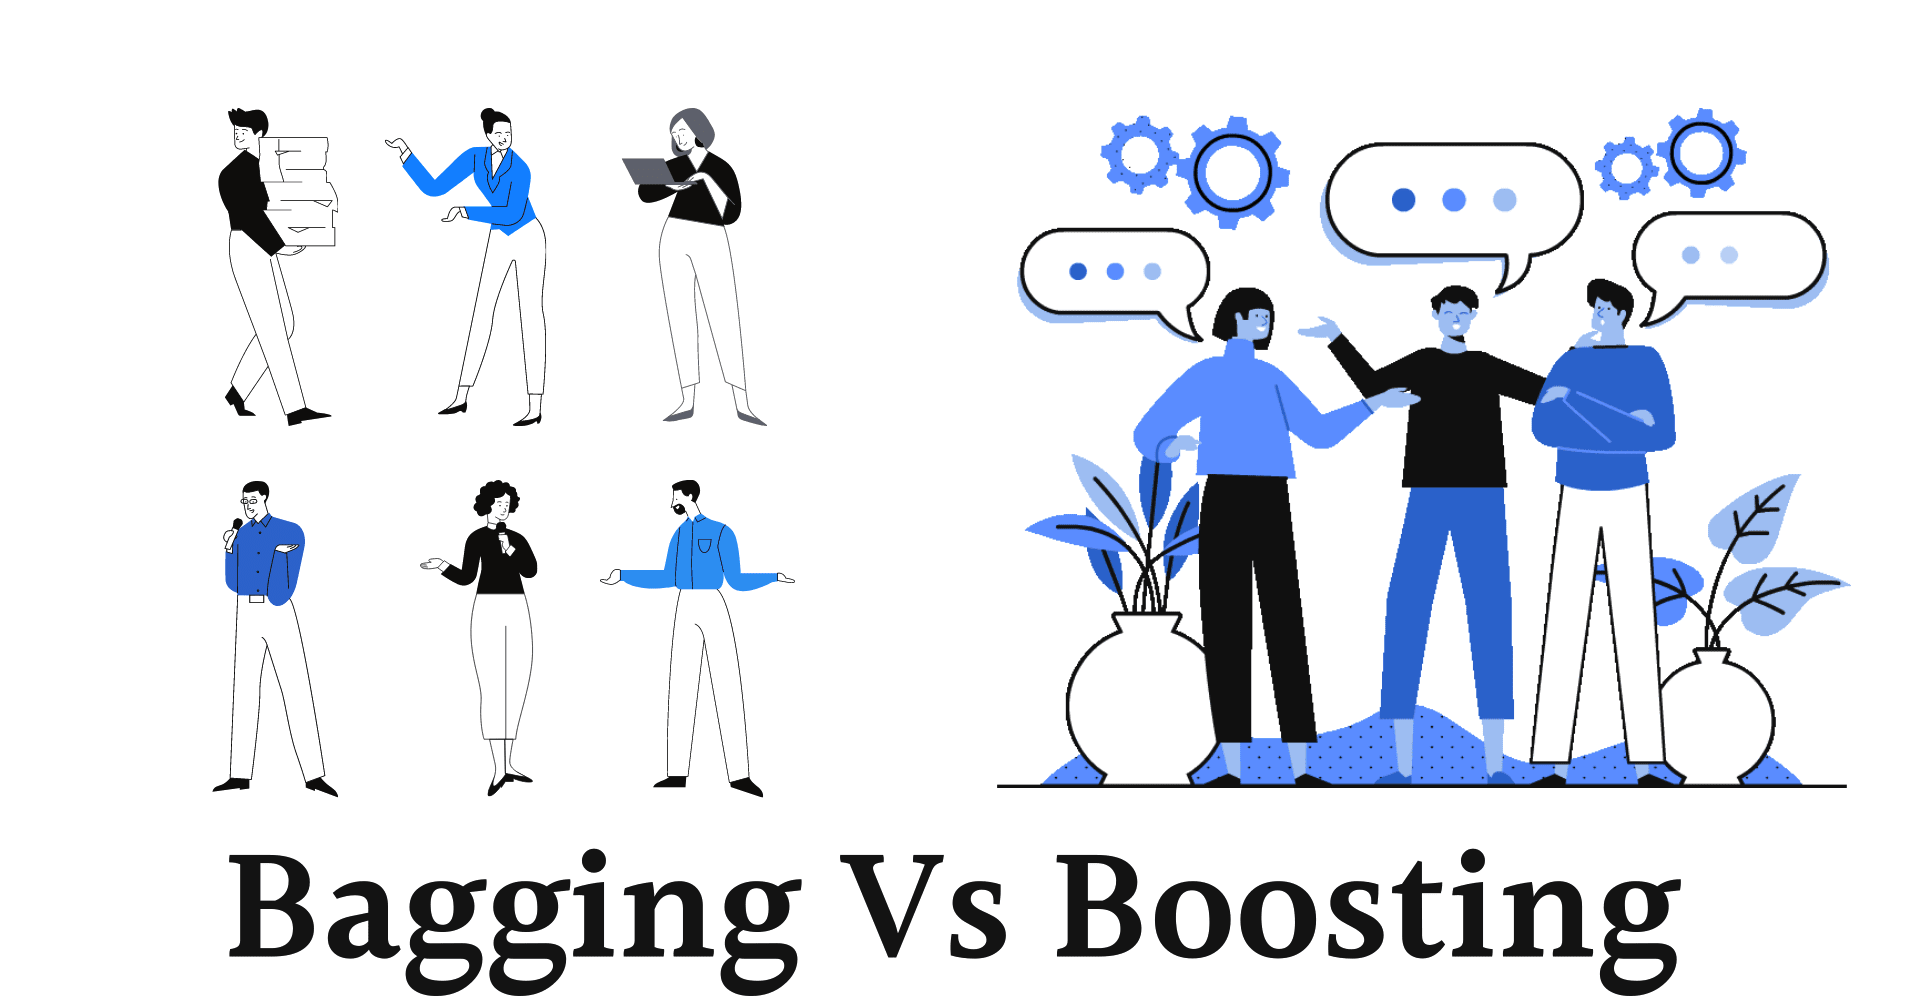

# Our Plan

Now, let's take a quick look at what we'll be discussing in this notebook. There's a lot of aspects to cover on this topic and I can't possibly fit them all in one notebook so here are some of the most important ones. I'll try to go over the main ideas and concepts and keep working on subsequent notebooks to add to this series.

- Background
- Regression/Classification Trees
    - Growing and Pruning Trees
- Ensembling
- Bagging
    - Random Forest
- Boosting
    - AdaBoost, Gradient Boosting, XGBoost, LightGBM
- Common Questions
- Discussions/ML Interview Questions


# Background

Going into this notebook, I'm assuming that you know some of the basics of Machine Learning. If not, there are plenty of resoures online that could give you an detailed overview of these concepts. 

As a quick refresher, you can refer to this chart here. The sticky notes show some algorithms for each. Keep in mind, some of these models can be used for regression as well as classification!

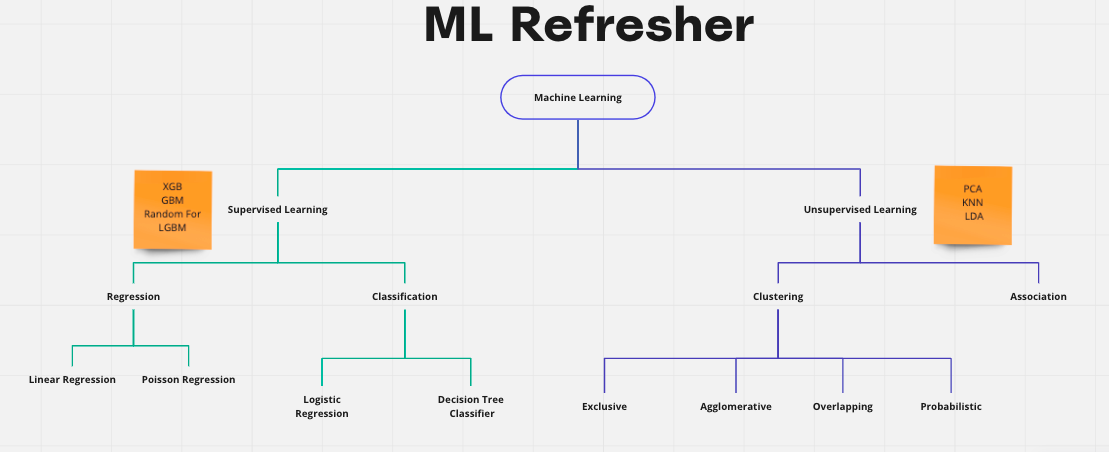

# Regression and Classification Trees

While 'vanilla' **Regression Trees** don't perform too well (in terms of prediction), they act as the building block for some of the best ’blackbox’ prediction procedures available today.

Regression trees predict outcomes based on a sequence of simple binary (yes/no)decisions. For example, if height < 1.85m, go left. If weight < 90kg, go left. And we end up with the value 18.
The image on the right is the split of the predictor space of the same tree. Y = 18 corresponds to the space where height (x axis) < 1.85 and weight (y axis) < 90.

**Classification Trees** work in the exact same way but the end goal is predicting a categorical variable instead of a continuous variable.

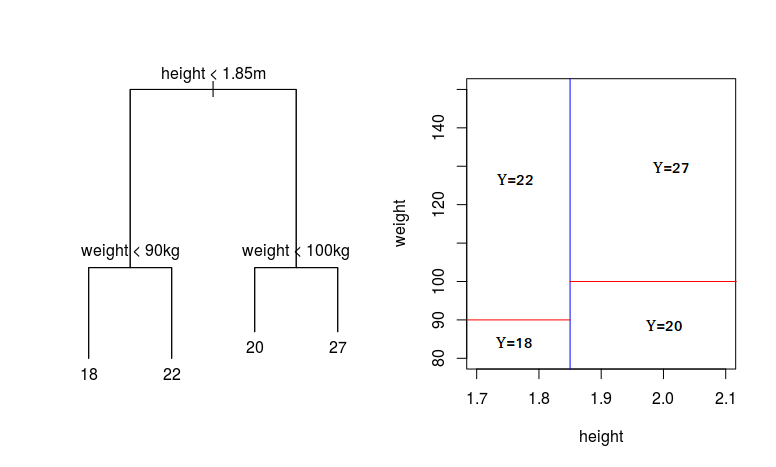

### Trees - Growing and Pruning

So we discussed what these basic building blocks are and how to interpret them but how is the tree built?

We **grow** a tree using recursive splitting on the training data. But, growing trees with too many leaves leads to high variance and we can't have that. So, once we grow the tree, we **prune** it to optimal size using cross-validation. 
*Question for you*: Why do you think we grow a tree first and prune it later? Why not just grow a smaller tree directly?

Like I mentioned earlier, Regression and Classification trees are easy to interpret and can handle large data but their predicitve performance is poor. So how do we improve on it?

# Ensembling Techniques

Ensembling means combining multiple models. We utilise multiple machine learning models and train the dataset on this *ensembled model* to get the output. In this notebook, we will be looking at Bagging and Boosting and the algorithms that use these concepts. You've probably heard these terms before but what are they and what makes them so good? Why is it that almost every Kaggle competition uses these algorithms? 

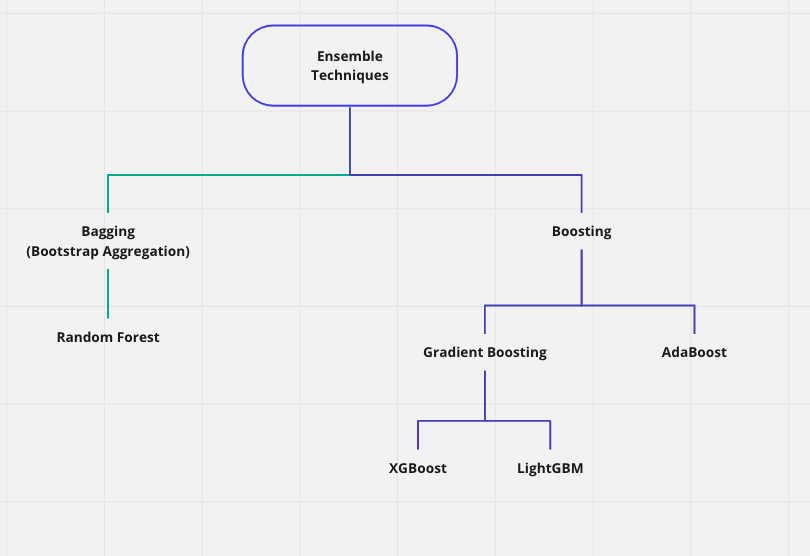

# Bagging

Bagging is short for **Bootstrap Aggregating**. 

Given a sample (X1,y1),...,(Xn,yn), a bootstrap sample is obtained by randomly sampling n of the pairs with replacement. As you can see in the figure below, we have n classifier models. We use *Row Sampling with Replacement* to split the training data and feed it to each of the n models. Remember, these models could be anything. It's an ensemble technique and bagging could use any set of models for this.

Now, each model is trained on the bootstrap samples of the training data and using this we create a final *ensemble classifier* which uses the test data to make final predictions. The first step of training data being split is called "bootstrapping" and the final step of combining all classifiers into the ensemble model is "aggregation".


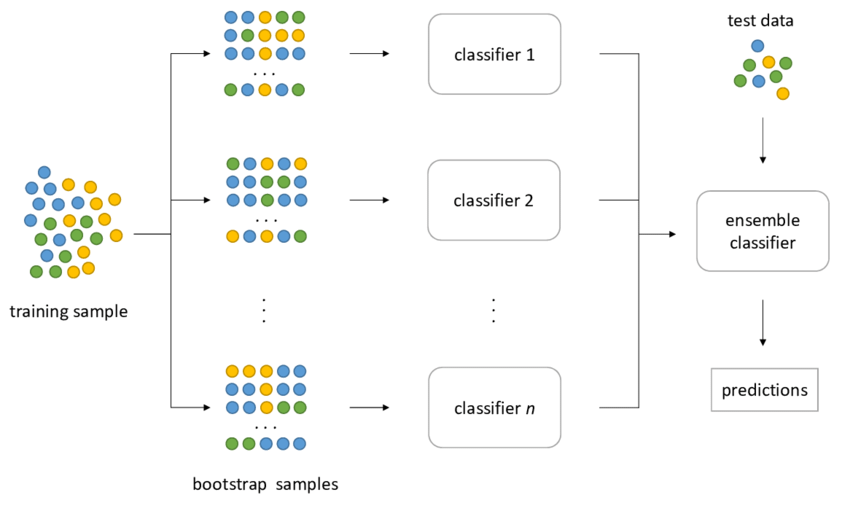

### Why

Compared to trees, Bagging leads to substantial improvements in *prediction performance* but sacrifices interpretation.  A single tree is easy to interpret, but an average over many trees is not. 

Since this approach consolidates discovery into more defined boundaries, it *decreases variance* and helps with *overfitting*.

One important aspect of Bagging is that it allows us to obtain *variable importance measures* which help us determine which features are important and useful for predicting the response.

# Random Forest

This is one of the most popular techniques used for both regression and classification. The idea of Random Forests is very similar to Bagging but with a small modfication - At each step of growing a tree, a random sample of m features is drawn, and only those m features are considered for splitting. We use only m ≤ p randomly selected predictors (p is the number of features and m is a tuning parameter).

- We use the same boostrap method as Bagging but here instead of base classifiers we use Decision Trees. Now, along with the data from Row Sampling with replacement, we feed each Decision Tree some *Feature Sampling with Replacement* as well. In other words, we are selecting the variables and performing boostrap sampling on those as well (selecting m features).

Note: Decision Trees (DT) are prone to low bias and a high variance. This is where our bagging aspect comes in use since the combination of all DT will help reduce the variance.

- For each tree grown on a bootstrap sample, the error rate for observations left out of the bootstrap sample is monitored. This is called the “out-of-bag” error rate.


Note: For a Random Forest Classifier, the Aggregation works by taking the "majority" results of the DT but for Regressor, we either take the mean or the median of the DT results. 


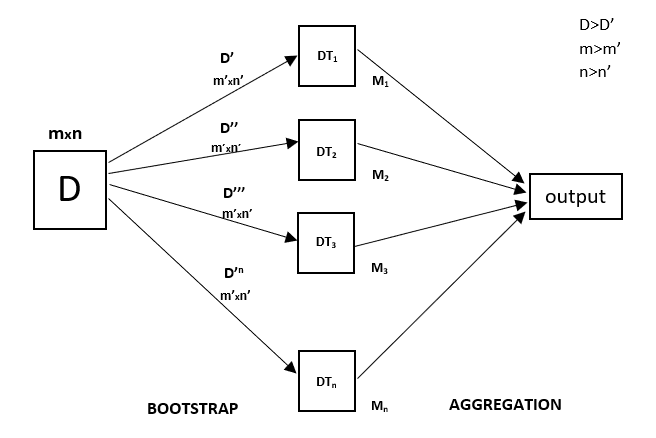

### Why

In Random Forest, using only some of the predictors has several advantages:
- Weaker predictors also get a chance:  if one of the predictors has strong relation to the response, it is likely that most splits when growing trees in bagging will be along this predictor.  However, in random forests, if m < p, we sometimes split without using this predictor.  If other predictors are informative they will also be used for growing trees.
- Reducing dependence between trees:  the main motivation for bagging is to reduce variance by averaging over trees.  If only a subset of predictors is allowed to enter each tree, this makes trees even more independent.

# Boosting

We showed how regression trees can be substantially improved by randomisation leading to bagging and random forest. An alternative method to this is called *Boosting*.

We have two distinct ideas in Boosting:
- Fit models to residuals:  Once we learn a regression function, we have residuals.  If the regression function did not capture all dependence between predictor and response, we try to fit another model using residuals as response.
- Slow learning:  instead of attempting to learn complete information form data in one step, learn a bit, then a bit more etc.

As shown in the image, the primary difference in Bagging is that here, we use a sequential system. In other words, we pass the training data to our initial base learner model (Model 1). This first model would have some incorrect classifications. We use these incorrect clssifications to train the second model and this goes on. This is why there is slow learning. The model is learning in small steps.

The parameters we use for tuning our Boosting model are:
- number of trees (B)
- shrinkage parameter (λ)
- number of internal nodes in each tree (d)

Generally, remember that a high B leads to worse performance and B should be selected with cross-validation. Alternatively, the d is usually between 4 and 10 and λ is usually between 0.001 and 0.1

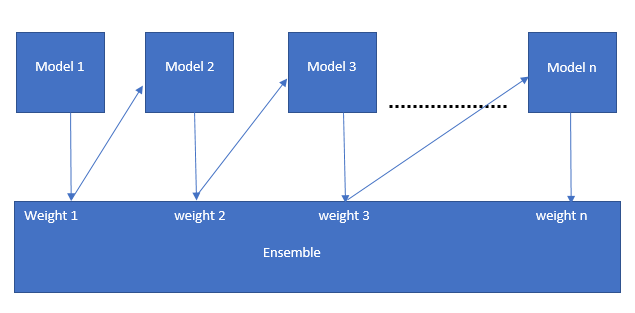


# AdaBoost

This algorithm is a modification of Boosting. Here, we assign weights (w) to the data. Initially, we assign the same weights to everything where w=1/N (The figure below shows the overview of how AdaBoost works and how the weights are passed down)

Now, we create our first sequential base learner model for Boosting. For this, we will use Decision Trees (DT) of depth=1. Let's take an example of binary classification for simplicity. We perform the following steps for each m:
- We fit a classifier to the training data (using weights w)
- Compute the total error of the newest tree (err) 
- Using the err, we find the performance of the classifier (α)
- Using the α, we update the weights of the of the data. We increase the weights of the incorrect classifications and decrease the weights of the correct classifications

And finally, we use the weights from all the classifiers to build our final "Strong Classifier"

An *advantage* of AdaBoost over other models (like Gradient Boosting and XGBoost) is that it can handle missing values, doesn't overfit and has fewer features to tune.

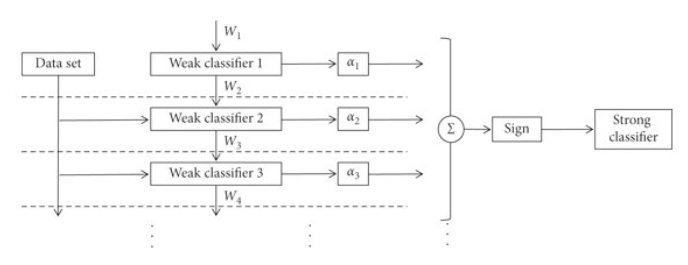

### Illustration

Here's another illustration that might help understand the algorithm a little better:

As shown in the figure below, AdaBoost **starts** by building a tree (AdaBoost uses trees with only 2 leaves, also known as stumps) on the Training data. Then, it builds a **new stump** based on the errors that the previous stump made. Here, the new stump (iteration 2) did a bad job of compensating for the errors of the previous stump and the reduced size reflects that. The AdaBoost builds another stump from the errors of the previous one and in this example the third iteration does better thereby leading to a larger size. The algorithm continues to make new trees until the number specified by the user or until it has a perfect fit.

<a href='https://www.linkpicture.com/view.php?img=LPic61895288bc94e341439157'><img src='https://www.linkpicture.com/q/ada.png' type='image'></a>


# Gradient Boosting 

One of the most popular Boosting algorithms is Gradient Boosting (gbm). To understand this algorithm a little better, let's compare it to AdaBoost that we just learnt. 

Unlike AdaBoost, the Gradient Boost starts by making a single leaf that represents an *initial* guess for the weights of all the samples. When we try to predict a coninuous variable (for a regression problem), the first guess is the **average** value (shown in the yellow leaf below). Then, Gradient Boost builds a tree where the tree is based on the erros of the previous tree (like AdaBoost). However, unlike AdaBoost, this tree is larger than a stump. The algorithm keeps building new trees based on errors from the previous trees until it reaches the number of trees specified or until new trees don't improve on the error anymore. 

Note: Gradient Boosting scales the trees as well. However, unlike AdaBoost, it scales all trees by the same amount (the learning rate).

<a href='https://www.linkpicture.com/view.php?img=LPic618952c26178c652676676'><img src='https://www.linkpicture.com/q/gbm.png' type='image'></a>

#### Error Calculation by GBM

We already mentioned that the algorithm uses the previous tree's error to build the next tree but how does it calculate this error? The most common configuration to calcuate the error is to find the *Residual* (difference between Observed Weight and Predicted Weight). Now, the next tree in the algorithm uses the features to predict the residuals (not the original data) and this goes on.

------

#### Example

Let's try to understand this better (using a tree with 4 leaves for simplicity). 

In the figure below, the first section in black are the features with 'weight' in blue being the target variable. The 'residuals' in red are part of the GBM calculation.  The GBM builds an initial leaf (yellow box) that makes an initial guess by taking the average of the target variable (78.3) and calculating residuals. The calculation of the residuals is shown on the right and these values become leaves for the next tree. As you can see in the tree, some leaves may have multiple residuals satisfying them so we take the average in this case. 

Now, we use our learning rate, initial average (78.3) and the new residuals to find our next set of residuals. This is in turn fed into the next tree and this process goes on and our residuals keep falling. This process might seem a little complicated at first and if you don't understand it, read some explanations online or you can leave a comment. *Note: You could build a tree with more leaves might lead to better partitions*

<a href='https://www.linkpicture.com/view.php?img=LPic618952c26178c652676676'><img src='https://www.linkpicture.com/q/gbm2.png' type='image'></a>

### Gradient Boosting Classifier

We talked about how the first leaf calculates an initial guess by averaging the values in the target variable. But what about classification when we have "Yes" and "No" as our target variables. Here, we take the Log Odds. In other words, if we have 4 positive values and 2 negative values, our initial guess will be ln(4/2) = 0.7. Keeping this in mind, the rest of our cacluations follow in a similar way and we find our residuals for each tree

# Other Models

Don't worry, I won't leave you hanging. I will keep adding to this notebook over the next few weeks when I get free. In the meantime, here are some of the popular Boosting algorithms that I've used in the past. You could try reading up on them! 
- XGBoost 
- LightGBM
- HistGBM
- CatBoost

# Performance Metrics

There are several performance metrics you can use for your algorithms. These are some of the most popular ones:
- Classification
    - Confusion Matrix
    - Precision, Recall, F1 score
    - ROC_AUC Score
- Regression
    - R2, Adjusted R2
    - MSE, RMSE, MAE

# Common Questions

A couple of questions I've seen people have are:
- Effects of One-Hot Encoding 
- How does Feature Scaling affect my model

To answer the first question, Tree-based models (like Decision Tree, Random Forest, XGBoost, GBM, etc) **don't perform well** with one-hot encoding. This is because one-hot encoding increases the number of variables and introduces sparsity in the data. The Decision Tree works by splitting the nodes and it might split one of the dummy variables if you perform encoding.
One-Hot Encoding with a Tree-based model essentially makes the model focus more on the continuous variables. So maybe try looking at the feature importance of the variables and see how important the categorical variables are.

As for the second question, Feature scaling is a method used to normalize the range of independent variables or features of data. Decision trees and ensemble methods **do not** require feature scaling to be performed as they are not sensitive to the the variance in the data. Scaling is beneficial if you are working with Support Vector Machines, KNN and other algorithms which use the distance between data. 


## Discussions/Interview Questions
There are a lot of other discussions we could have here and I can't include all. Here are some to think about:
- What's the impact of missing values and outliers on Decision Trees?
- What are the Hyperparameter Techniques for Boosting and Bagging?
- How do Decision Tree Work For Categorical and Numerical Features?
- What are the scenarios where Decision Tree works well?
- Why can AdaBoost handle missing values but GBM can't?


# Conclusion

Before we wrap up, let me mention again that this was just a brief overview and there are several resources online to learn about these models in depth. I have not been able to cover every model that I would have liked to but hopefully I have helped you gain a better intuition of how they work. 

Knowing how Bagging and Boosting work is a strong base for figuring out other algorithms and knowing the correct time to use them. If there are any models you've used recently and would like me to add, leave a comment!

Finally, a huge thank you to all the sources I used to helped me gain a better understanding of the models and make this notebook - Stanslav Volgushev (University of Toronto), Trevor Hastie (Stanford University), 3Blue1Brown (YouTube), Krish Naik (YouTube), StatQuest (YouTube).

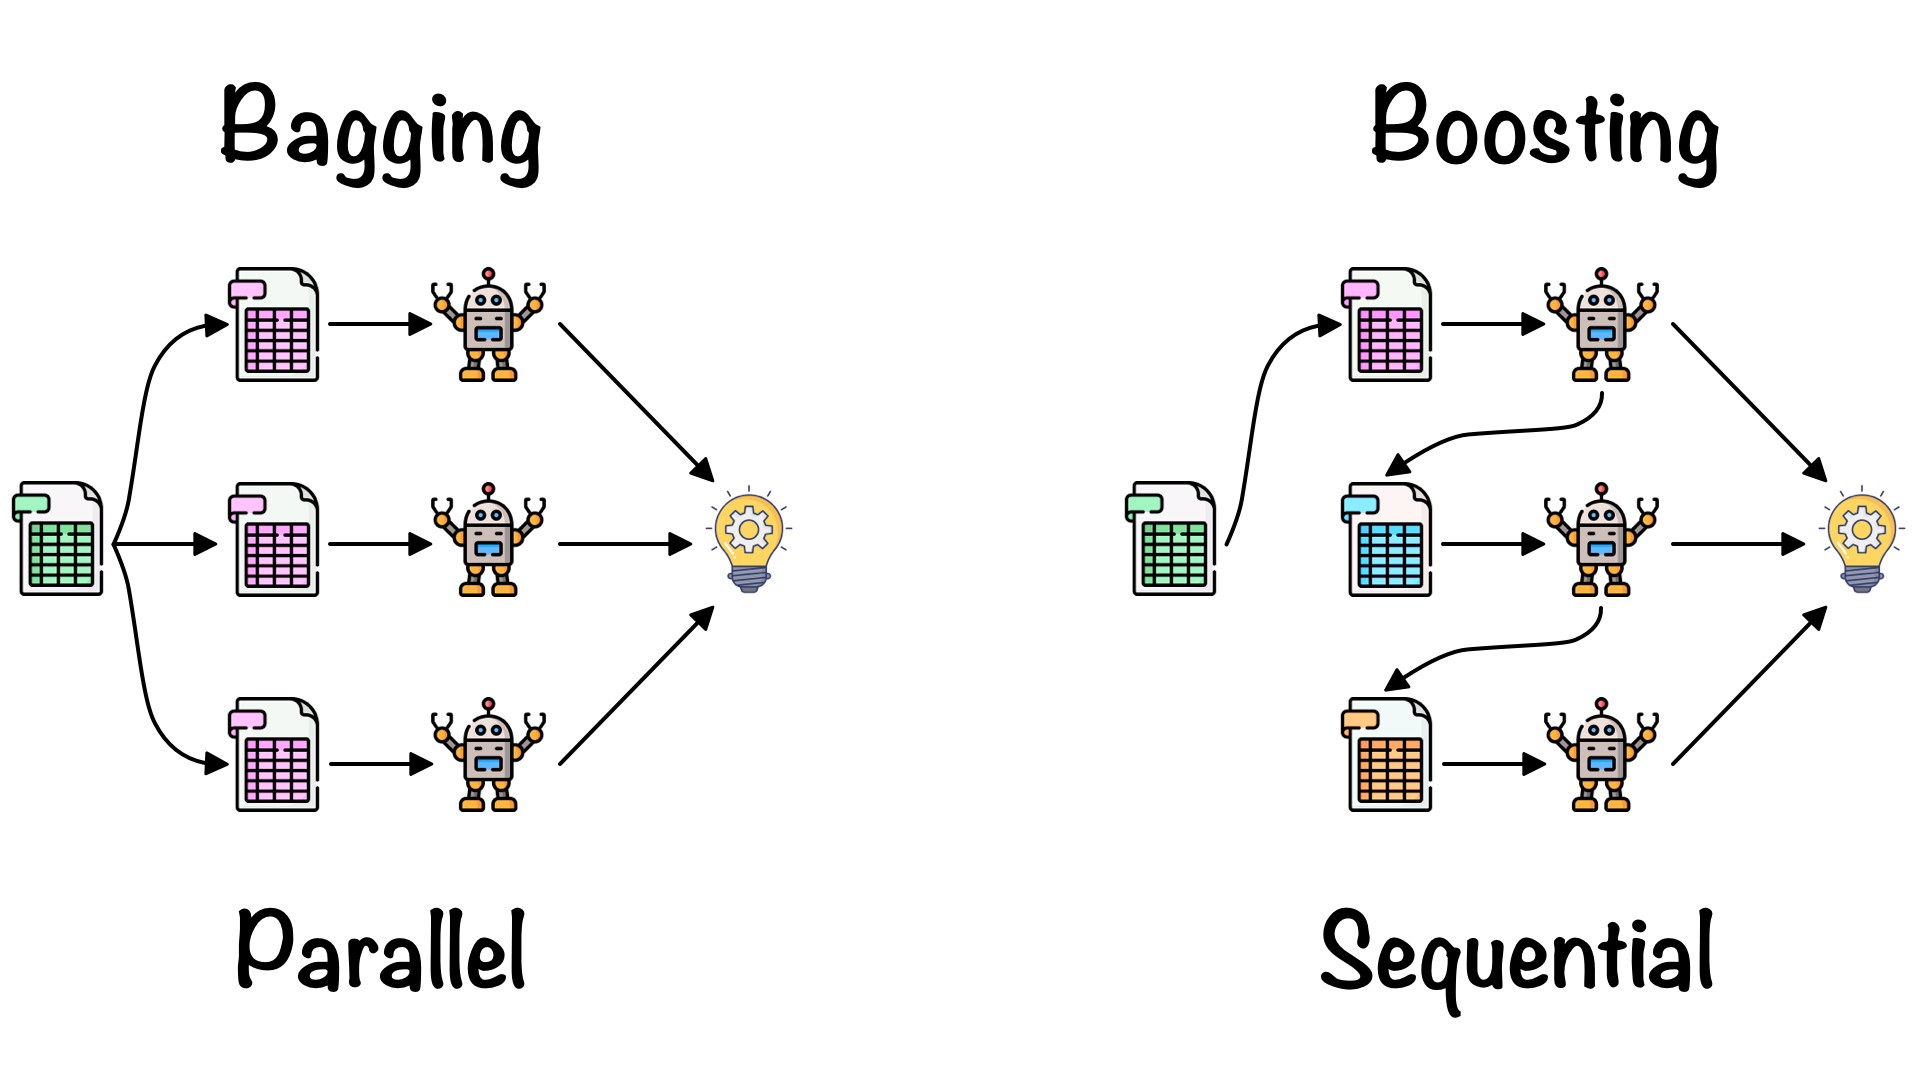